## ExMAS
> Exact Matching of Attractive Shared rides (ExMAS) for system-wide strategic evaluations
> 
> Kucharski R., Cats O. ,_Transportation Research Part: B_, 2020

---
#### Walkthrough

In [1]:
import os
cwd = os.getcwd()

In [2]:
os.chdir(os.path.join(cwd,'../..'))
import ExMAS.main
import ExMAS.utils

In [3]:
from ExMAS.utils import inData as inData

### prepare

1. __load the default config__ (see more details in `ExMAS/notebooks/01 configuration.ipynb`)

In [4]:
params = ExMAS.utils.get_config('ExMAS/data/configs/default.json') # load the default 

2. __load the network__ (see more details in `ExMAS/notebooks/02 NetworkGraphs.ipynb`)

In [5]:
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph

3. __generate trip requests__ (see more details in `ExMAS/notebooks/03 Demand Generation.ipynb`)

In [6]:
inData = ExMAS.utils.generate_demand(inData, params)

### run

03-07-20 14:02:52-INFO-Initializing pairwise trip shareability between 200 and 200 trips.
03-07-20 14:02:52-INFO-creating combinations
03-07-20 14:02:52-INFO-39800	 nR*(nR-1)
03-07-20 14:02:52-INFO-10559	departure compatibility
03-07-20 14:02:53-INFO-5325	origins shareability
03-07-20 14:02:53-INFO-1271	utility for i
03-07-20 14:02:53-INFO-365	utility for j
03-07-20 14:02:53-INFO-206	LIFO pairs
03-07-20 14:02:54-INFO-Reduction of feasible pairs by 99.48%


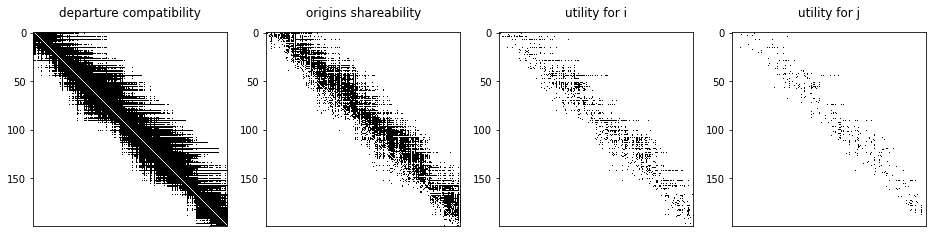

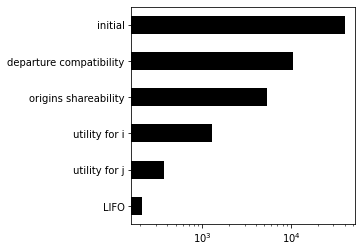

03-07-20 14:02:54-INFO-Degree 2 	Completed
03-07-20 14:02:54-INFO-trips to extend at degree 2 : 571
03-07-20 14:02:55-INFO-At degree 2 feasible extensions found out of 71 searched
03-07-20 14:02:55-INFO-Degree 3 	Completed
03-07-20 14:02:55-INFO-trips to extend at degree 3 : 71
03-07-20 14:02:55-INFO-At degree 3 feasible extensions found out of 6 searched
03-07-20 14:02:55-INFO-Degree 4 	Completed
03-07-20 14:02:55-INFO-trips to extend at degree 4 : 6
03-07-20 14:02:55-INFO-At degree 4 feasible extensions found out of 0 searched
03-07-20 14:02:55-INFO-Degree 5 	Completed
03-07-20 14:02:55-INFO-No more trips to exted at degree 5
03-07-20 14:02:55-INFO-Matching 200 trips to 848 rides in order to minimize u_veh


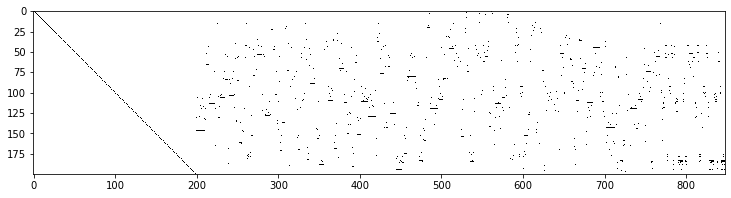

03-07-20 14:02:56-INFO-Problem solution: Optimal. 
Total costs for single trips:         64,424 
reduced by matching to:               52,833
03-07-20 14:02:56-INFO-Calculations  completed
03-07-20 14:02:56-INFO-DotMap(VehHourTrav=52158, VehHourTrav_ns=64424, PassHourTrav=71838, PassHourTrav_ns=64424, PassUtility=950.704925, PassUtility_ns=999.5785, mean_lambda=0.25805374357147626, revenue_s=67645.2, revenue_ns=96636.0, Fare_Discount=-0.30000000000000004, nR=200, SINGLE=84, PAIRS=45, TRIPLES=6, QUADRIPLES=2, QUINTETS=0, PLUS5=0, shared_ratio=0.5800000000000001, fleet_size_nonshared=27.0, fleet_size_shared=23.0, lambda_shared=0.25805374357147626)


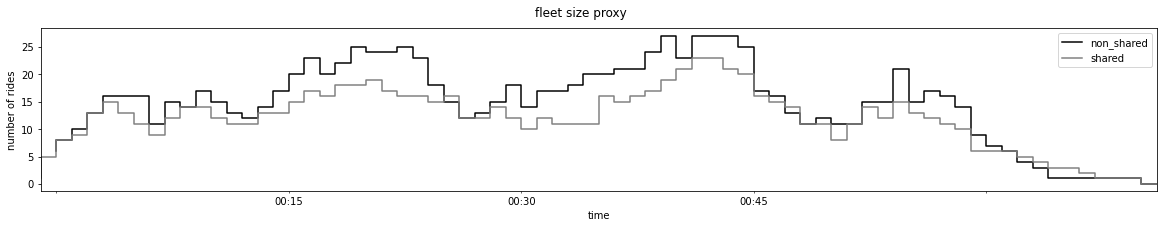

In [7]:
inData = ExMAS.main(inData, params, plot = True)

### results:
> illustrative example of 100 rides

KPIs

In [8]:
KPIs = inData.sblts.res.to_frame()
KPIs['description']  = ExMAS.utils.KPIs_descriptions
KPIs.columns = ['KPI', 'description']
KPIs

,KPI,description
VehHourTrav,52158,total travel time of vehicles (with travellers...
VehHourTrav_ns,64424,as above yet in non-shared scenarion
PassHourTrav,71838,total travel time of passengers
PassHourTrav_ns,64424,as above yet in non-shared scenarion
PassUtility,950.705,total (dis)utility of passengers
PassUtility_ns,999.578,as above yet in non-shared scenarion
mean_lambda,0.258054,mean vehicle cost reduction (lambda) over shar...
revenue_s,67645.2,total fares paid by travellers sharing
revenue_ns,96636,as above yet in non-shared scenarion
Fare_Discount,-0.3,relative revenue reduction


 all feasible rides

In [9]:
inData.sblts.rides.sample(5)

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,lambda_r,PassHourTrav_ns,row,selected
734,"[120, 141]",14.00140,887,21,"[10.095225, 3.9061749999999993]","[2206.5, 280, 292, 300]","[120, 141]","[141, 120]",2.0,734,0.112112,999,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
259,"[120, 158]",16.42620,1302,20,"[9.380875, 7.045324999999999]","[2194.5, 657, 85, 545]","[120, 158]","[120, 158]",2.0,259,-0.095960,1188,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
262,"[177, 181]",4.79010,259,20,"[2.2098999999999998, 2.5801999999999996]","[3231.0, 38, 148, 58]","[177, 181]","[177, 181]",2.0,262,0.222222,333,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
368,"[35, 37]",13.14600,704,20,"[5.551874999999999, 7.594125]","[628.5, 45, 413, 231]","[35, 37]","[35, 37]",2.0,368,0.258947,950,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
708,"[143, 177]",12.41275,1005,21,"[10.300674999999998, 2.112075]","[2544.5, 663, 154, 173]","[143, 177]","[177, 143]",2.0,708,-0.222628,822,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0


selected rides in the solution

In [10]:
inData.sblts.schedule.sample(5)

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,lambda_r,PassHourTrav_ns,row,selected
456,"[156, 175]",9.8294,625,20,"[5.898899999999999, 3.9304999999999994]","[2798.0, 337, 130, 143]","[156, 175]","[156, 175]",2,456,0.087591,685,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
768,"[16, 13]",12.5335,716,21,"[7.7812, 4.7523]","[212.0, 85, 351, 265]","[16, 13]","[13, 16]",2,768,0.172254,865,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
47,[47],3.6485,235,1,[3.6485000000000003],"[865, 235]",[47],[47],1,47,0.300000,235,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
484,"[18, 21]",5.9535,402,20,"[2.6643749999999997, 3.2891249999999994]","[261.5, 147, 72, 168]","[18, 21]","[18, 21]",2,484,0.026634,413,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
55,[55],3.9725,256,1,[3.9724999999999997],"[971, 256]",[55],[55],1,55,0.300000,256,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1


trips with parameters of the shared ride

In [11]:
inData.sblts.requests.sample(5)

,index,origin,destination,treq,tdep,ttrav,tarr,tdrop,dist,pax_id,VoT,delta,u,u_PT,ride_id,ttrav_sh,u_sh,kind,position
29,10,44833576,4217813217,517,NaN,102,2020-07-03 14:52:27,NaN,822,10,0.0035,57.758242,1.5900,999999,29,102,1.590000,1,0
187,141,385474972,44773463,3333,NaN,274,2020-07-03 16:02:14,NaN,2193,141,0.0035,153.659341,4.2485,999999,187,274,4.248500,1,0
28,57,1552650568,1518087729,508,NaN,398,2020-07-03 15:31:43,NaN,3187,57,0.0035,223.351648,6.1735,999999,28,398,6.173500,1,0
75,148,44725075,3669218090,1241,NaN,648,2020-07-03 16:17:13,NaN,5184,148,0.0035,363.164835,10.0440,999999,532,755,8.971725,20,1
56,183,44797365,4301397897,984,NaN,543,2020-07-03 15:58:56,NaN,4344,183,0.0035,304.318681,8.4165,999999,555,593,7.989625,20,1


---
(c) Rafał Kucharski, Delft, 2020